### Prophet exercise

In [6]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
# from fbprophet import Prophet
from prophet import Prophet

In [7]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [8]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


In [23]:
wmt.dtypes
wmt['Date'] = pd.to_datetime(wmt['Date'])
wmt.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

* use only the `Date` and `Adj Close` columns

In [24]:
df = wmt[['Date', 'Adj Close']]

* rename columns to fit the Prophet naming convention

In [34]:
df.columns = ['ds', 'y']

* convert date to datetime

In [26]:
df.head()

,DS,Y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* plot time-series

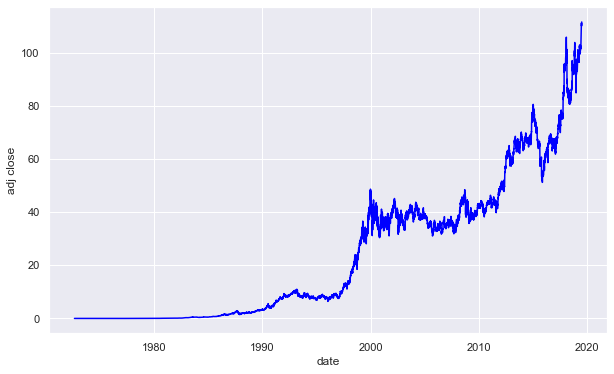

In [31]:
import matplotlib.pyplot as plt
x = df.DS

y = df.Y
fig, ax = plt.subplots(figsize = (10,6))


ax.plot(x,y,'blue')

plt.xlabel('date')
plt.ylabel('adj close')
plt.show()

* instantiate Prophet

In [32]:
m = Prophet()

* fit model

In [35]:

m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -562.06


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       32315.1     0.0107247       5177.21           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       33274.5     0.0120694       3993.63      0.3066           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       33592.5     0.0196687       5400.26           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         33756    0.00421749       1861.22           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       33823.2   0.000479588       632.788           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

* forecast 365 values into the future 

In [37]:
future = m.make_future_dataframe(periods=365)
# future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
12175,2020-06-27,96.514404,91.356468,101.599002
12176,2020-06-28,96.517143,91.291099,101.614815
12177,2020-06-29,96.500567,92.054198,101.564894
12178,2020-06-30,96.520705,91.603863,101.760450
12179,2020-07-01,96.510346,91.462732,101.606266


* plot forecast

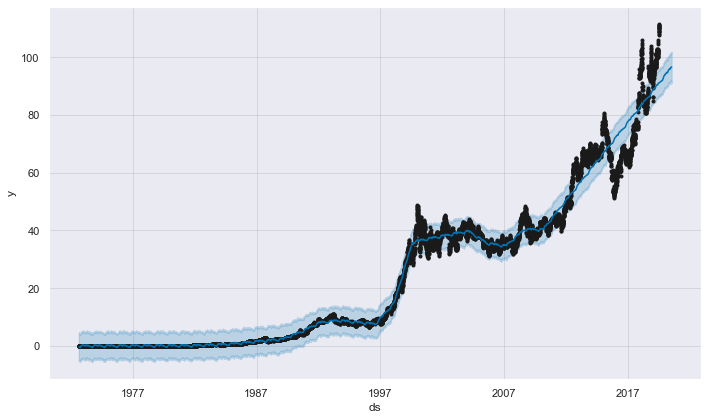

In [38]:
fig1 = m.plot(forecast)


* plot components

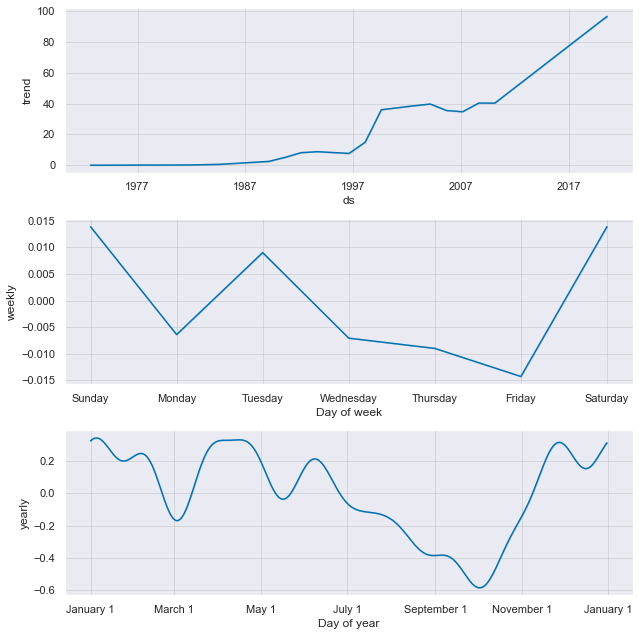

In [39]:
fig2 = m.plot_components(forecast)


- Compare the Prophet prediction vs the Arima prediction. Use the last 7 values we have in the timeseries as your test data.

In [ ]:
# oh, no thank you!